# 데이터분석 과제
## 상권분석
###  각 상권에 맞는 마케팅 방안 제안
#### 상권분석을 통해 특정 상권에 적합한 서비스 업종과 타겟 고객층과 같은 적합한 마케팅 방안을 제안한다.

가설 1. 각 상권에서 가장 많은 점포수를 차지하는 서비스 업종은 상권마다 다를 것이다.   
가설 2. 연령대가 올라갈수록 건당평균매출(매출금액/매출건수)이 높을 것이다.  
가설 3. 서비스 업종마다 매출 비율이 높은 시간대가 다를 것이다.  
가설 4. 각 서비스 업종마다 주 소비 연령대와 성별이 다를 것이다.  
가설 5. 각 상권에서 특히 매출이 높은 서비스 업종은 무엇인가?  
가설 6. 분기별로 같은 상권에서라도 매출의 차이가 있을 것이다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/jisoo/Downloads/서울시_상권분석서비스(상권_추정매출)_2021년/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv', encoding = 'cp949')
data

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,626851391,25502,...,157,15667,7253,108,1098,2013,4344,7792,7568,28
1,2021,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,122957138,12039,...,0,6679,4293,52,926,1222,2698,3404,2670,9
2,2021,1,A,골목상권,2110001,이북5도청사,CS100009,호프-간이주점,5093349,177,...,9,124,36,0,0,9,18,62,71,3
3,2021,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,13507733,1359,...,8,356,881,0,243,260,213,288,235,5
4,2021,1,A,골목상권,2110001,이북5도청사,CS200001,일반교습학원,37551380,128,...,0,56,72,0,0,8,96,8,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140825,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,997157377,14124,...,423,6916,5717,105,3128,4161,2715,1194,1328,5
140826,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,11911789492,6524,...,0,2704,3820,0,23,494,1493,1634,2880,6
140827,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,1717076948,8760,...,66,3585,4551,144,1800,1852,1392,926,2021,8
140828,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300035,인테리어,12566919,370,...,0,0,370,0,0,0,0,370,0,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140830 entries, 0 to 140829
Data columns (total 80 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   기준_년_코드          140830 non-null  int64 
 1   기준_분기_코드         140830 non-null  int64 
 2   상권_구분_코드         140830 non-null  object
 3   상권_구분_코드_명       140830 non-null  object
 4   상권_코드            140830 non-null  int64 
 5   상권_코드_명          140830 non-null  object
 6   서비스_업종_코드        140830 non-null  object
 7   서비스_업종_코드_명      140830 non-null  object
 8   분기당_매출_금액        140830 non-null  int64 
 9   분기당_매출_건수        140830 non-null  int64 
 10  주중_매출_비율         140830 non-null  int64 
 11  주말_매출_비율         140830 non-null  int64 
 12  월요일_매출_비율        140830 non-null  int64 
 13  화요일_매출_비율        140830 non-null  int64 
 14  수요일_매출_비율        140830 non-null  int64 
 15  목요일_매출_비율        140830 non-null  int64 
 16  금요일_매출_비율        140830 non-null  int64 
 17  토요일_매출_비율 

In [4]:
# 데이터 shape 파악
data.shape

(140830, 80)

In [5]:
# 데이터 통계량 파악
data.describe()

,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
count,140830.0,140830.000000,1.408300e+05,1.408300e+05,1.408300e+05,140830.000000,140830.000000,140830.000000,140830.000000,140830.000000,...,140830.000000,1.408300e+05,1.408300e+05,140830.000000,1.408300e+05,1.408300e+05,1.408300e+05,1.408300e+05,1.408300e+05,140830.000000
mean,2021.0,2.491884,2.107463e+06,6.605020e+08,2.508127e+04,76.607186,23.482184,14.983917,15.054491,15.181389,...,2109.016857,1.296410e+04,1.108753e+04,426.484158,5.558208e+03,5.572986e+03,4.800850e+03,4.295014e+03,3.398089e+03,14.073777
std,0.0,1.116559,9.912187e+04,6.392957e+09,1.079546e+05,16.206145,16.219016,11.926010,11.807894,11.481872,...,10403.788454,5.825189e+04,4.770289e+04,2699.763926,2.767903e+04,2.696119e+04,2.073315e+04,1.802869e+04,2.170130e+04,64.870998
min,2021.0,1.000000,1.001491e+06,6.400000e+01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,2021.0,1.000000,2.110465e+06,2.499141e+07,4.580000e+02,67.000000,12.000000,10.000000,10.000000,11.000000,...,0.000000,2.100000e+02,1.710000e+02,0.000000,2.400000e+01,5.600000e+01,8.700000e+01,8.500000e+01,4.600000e+01,3.000000
50%,2021.0,2.000000,2.110934e+06,9.637203e+07,2.469000e+03,76.000000,24.000000,13.000000,14.000000,14.000000,...,24.000000,1.221000e+03,9.995000e+02,4.000000,2.450000e+02,3.940000e+02,4.960000e+02,5.040000e+02,3.130000e+02,6.000000
75%,2021.0,3.000000,2.120173e+06,3.726180e+08,1.358075e+04,88.000000,33.000000,18.000000,18.000000,18.000000,...,487.000000,6.616750e+03,5.883750e+03,97.000000,1.932000e+03,2.442750e+03,2.563000e+03,2.526000e+03,1.731750e+03,12.000000
max,2021.0,4.000000,2.130326e+06,9.766593e+11,8.757373e+06,100.000000,100.000000,100.000000,100.000000,100.000000,...,461232.000000,5.002993e+06,3.162184e+06,248274.000000,1.413897e+06,1.715676e+06,1.640984e+06,1.778561e+06,2.595689e+06,10121.000000


In [6]:
data.기준_년_코드.unique()

array([2021], dtype=int64)

In [7]:
data.기준_분기_코드.unique()

array([1, 2, 3, 4], dtype=int64)

In [8]:
data.상권_구분_코드.unique()

array(['A', 'D', 'R', 'U'], dtype=object)

In [9]:
data.상권_구분_코드_명.unique()

array(['골목상권', '발달상권', '전통시장', '관광특구'], dtype=object)

### 상권 구분
#### 골목상권   
대로변이 아닌 거주지 안의 좁은 도로를 따라 형성되는 상업 세력의 범위
#### 발달상권   
유통산업발전법 제5조의 법조항에 따라 2천 제곱미터 이내 50개 이상의 상점이 분포하는 경우 “상점가”라 하고, 배후지를 고려하지 않은 도보이동이 가능한 범위내의 상가업소밀집지역을 발달상권으로 정의
(도매･소매･음식･숙박･생활서비스･금융･부동산･학문･교육･의료복지･문화예술종교･관광여가오락 등의 8개 업종대분류 점포가 밀집한 지구로 정의)  
#### 전통시장   
오랜 기간에 걸쳐 일정한 지역에서 자연발생적으로 형성된 상설시장이나 정기시장
#### 관광특구  
관광활동이 주로 이루어지는 지역적 공간 內 입지한 상권

In [10]:
from IPython.display import IFrame

html_file_path = '프로파일링_보고서.html'  
IFrame(html_file_path, width=800, height=600) 

In [11]:
# 컬럼명 영문으로 변경
data.rename(columns = {'기준_년_코드':'STDR_YY_CD',
                       '기준_분기_코드':'STDR_QU_CD',
                       '상권_구분_코드':'TRDAR_SE_CD',
                       '상권_구분_코드_명':'TRDAR_SE_CD_NM',
                       '상권_코드':'TRDAR_CD',
                       '상권_코드_명':'TRDAR_CD_NM',
                       '서비스_업종_코드':'SVC_INDUTY_CD',
                       '서비스_업종_코드_명':'SVC_INDUTY_CD_NM',
                       '분기당_매출_금액':'THSMON_SELNG_AMT',
                       '분기당_매출_건수':'THSMON_SELNG_CO',
                       '주중_매출_비율':'MDWK_SELNG_RATE',
                       '주말_매출_비율':'WKEND_SELNG_RATE',
                       '월요일_매출_비율':'MON_SELNG_RATE',
                       '화요일_매출_비율':'TUES_SELNG_RATE',
                       '수요일_매출_비율':'WED_SELNG_RATE',
                       '목요일_매출_비율':'THUR_SELNG_RATE',
                       '금요일_매출_비율':'FRI_SELNG_RATE',
                       '토요일_매출_비율':'SAT_SELNG_RATE',
                       '일요일_매출_비율':'SUN_SELNG_RATE',
                       '시간대_00~06_매출_비율':'TMZON_00_06_SELNG_RATE',
                       '시간대_06~11_매출_비율':'TMZON_06_11_SELNG_RATE',
                       '시간대_11~14_매출_비율':'TMZON_11_14_SELNG_RATE',
                       '시간대_14~17_매출_비율':'TMZON_14_17_SELNG_RATE',
                       '시간대_17~21_매출_비율':'TMZON_17_21_SELNG_RATE',
                       '시간대_21~24_매출_비율':'TMZON_21_24_SELNG_RATE',
                       '남성_매출_비율':'ML_SELNG_RATE',
                       '여성_매출_비율':'FML_SELNG_RATE',
                       '연령대_10_매출_비율':'AGRDE_10_SELNG_RATE',
                       '연령대_20_매출_비율':'AGRDE_20_SELNG_RATE',
                       '연령대_30_매출_비율':'AGRDE_30_SELNG_RATE',
                       '연령대_40_매출_비율':'AGRDE_40_SELNG_RATE',
                       '연령대_50_매출_비율':'AGRDE_50_SELNG_RATE',
                       '연령대_60_이상_매출_비율':'AGRDE_60_ABOVE_SELNG_RATE',
                       '주중_매출_금액':'MDWK_SELNG_AMT',
                       '주말_매출_금액':'WKEND_SELNG_AMT',
                       '월요일_매출_금액':'MON_SELNG_AMT',
                       '화요일_매출_금액':'TUES_SELNG_AMT',
                       '수요일_매출_금액':'WED_SELNG_AMT',
                       '목요일_매출_금액':'THUR_SELNG_AMT',
                       '금요일_매출_금액':'FRI_SELNG_AMT',
                       '토요일_매출_금액':'SAT_SELNG_AMT',
                       '일요일_매출_금액':'SUN_SELNG_AMT',
                       '시간대_00~06_매출_금액':'TMZON_00_06_SELNG_AMT',
                       '시간대_06~11_매출_금액':'TMZON_06_11_SELNG_AMT',
                       '시간대_11~14_매출_금액':'TMZON_11_14_SELNG_AMT',
                       '시간대_14~17_매출_금액':'TMZON_14_17_SELNG_AMT',
                       '시간대_17~21_매출_금액':'TMZON_17_21_SELNG_AMT',
                       '시간대_21~24_매출_금액':'TMZON_21_24_SELNG_AMT',
                       '남성_매출_금액':'ML_SELNG_AMT',
                       '여성_매출_금액':'FML_SELNG_AMT',
                       '연령대_10_매출_금액':'AGRDE_10_SELNG_AMT',
                       '연령대_20_매출_금액':'AGRDE_20_SELNG_AMT',
                       '연령대_30_매출_금액':'AGRDE_30_SELNG_AMT',
                       '연령대_40_매출_금액':'AGRDE_40_SELNG_AMT',
                       '연령대_50_매출_금액':'AGRDE_50_SELNG_AMT',
                       '연령대_60_이상_매출_금액':'AGRDE_60_ABOVE_SELNG_AMT',
                       '주중_매출_건수':'MDWK_SELNG_CO',
                       '주말_매출_건수':'WKEND_SELNG_CO',
                       '월요일_매출_건수':'MON_SELNG_CO',
                       '화요일_매출_건수':'TUES_SELNG_CO',
                       '수요일_매출_건수':'WED_SELNG_CO',
                       '목요일_매출_건수':'THUR_SELNG_CO',
                       '금요일_매출_건수':'FRI_SELNG_CO',
                       '토요일_매출_건수':'SAT_SELNG_CO',
                       '일요일_매출_건수':'SUN_SELNG_CO',
                       '시간대_건수~06_매출_건수':'TMZON_00_06_SELNG_CO',
                       '시간대_건수~11_매출_건수':'TMZON_06_11_SELNG_CO',
                       '시간대_건수~14_매출_건수':'TMZON_11_14_SELNG_CO',
                       '시간대_건수~17_매출_건수':'TMZON_14_17_SELNG_CO',
                       '시간대_건수~21_매출_건수':'TMZON_17_21_SELNG_CO',
                       '시간대_건수~24_매출_건수':'TMZON_21_24_SELNG_CO',
                       '남성_매출_건수':'ML_SELNG_CO',
                       '여성_매출_건수':'FML_SELNG_CO',
                       '연령대_10_매출_건수':'AGRDE_10_SELNG_CO',
                       '연령대_20_매출_건수':'AGRDE_20_SELNG_CO',
                       '연령대_30_매출_건수':'AGRDE_30_SELNG_CO',
                       '연령대_40_매출_건수':'AGRDE_40_SELNG_CO',
                       '연령대_50_매출_건수':'AGRDE_50_SELNG_CO',
                       '연령대_60_이상_매출_건수':'AGRDE_60_ABOVE_SELNG_CO',
                       '점포수':'STOR_CO'}, inplace = True)

In [12]:
data

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD,TRDAR_SE_CD_NM,TRDAR_CD,TRDAR_CD_NM,SVC_INDUTY_CD,SVC_INDUTY_CD_NM,THSMON_SELNG_AMT,THSMON_SELNG_CO,...,TMZON_21_24_SELNG_CO,ML_SELNG_CO,FML_SELNG_CO,AGRDE_10_SELNG_CO,AGRDE_20_SELNG_CO,AGRDE_30_SELNG_CO,AGRDE_40_SELNG_CO,AGRDE_50_SELNG_CO,AGRDE_60_ABOVE_SELNG_CO,STOR_CO
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,626851391,25502,...,157,15667,7253,108,1098,2013,4344,7792,7568,28
1,2021,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,122957138,12039,...,0,6679,4293,52,926,1222,2698,3404,2670,9
2,2021,1,A,골목상권,2110001,이북5도청사,CS100009,호프-간이주점,5093349,177,...,9,124,36,0,0,9,18,62,71,3
3,2021,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,13507733,1359,...,8,356,881,0,243,260,213,288,235,5
4,2021,1,A,골목상권,2110001,이북5도청사,CS200001,일반교습학원,37551380,128,...,0,56,72,0,0,8,96,8,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140825,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,997157377,14124,...,423,6916,5717,105,3128,4161,2715,1194,1328,5
140826,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,11911789492,6524,...,0,2704,3820,0,23,494,1493,1634,2880,6
140827,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,1717076948,8760,...,66,3585,4551,144,1800,1852,1392,926,2021,8
140828,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300035,인테리어,12566919,370,...,0,0,370,0,0,0,0,370,0,4


### 상권구분코드 별 서비스 업종 점포수 상위 20개

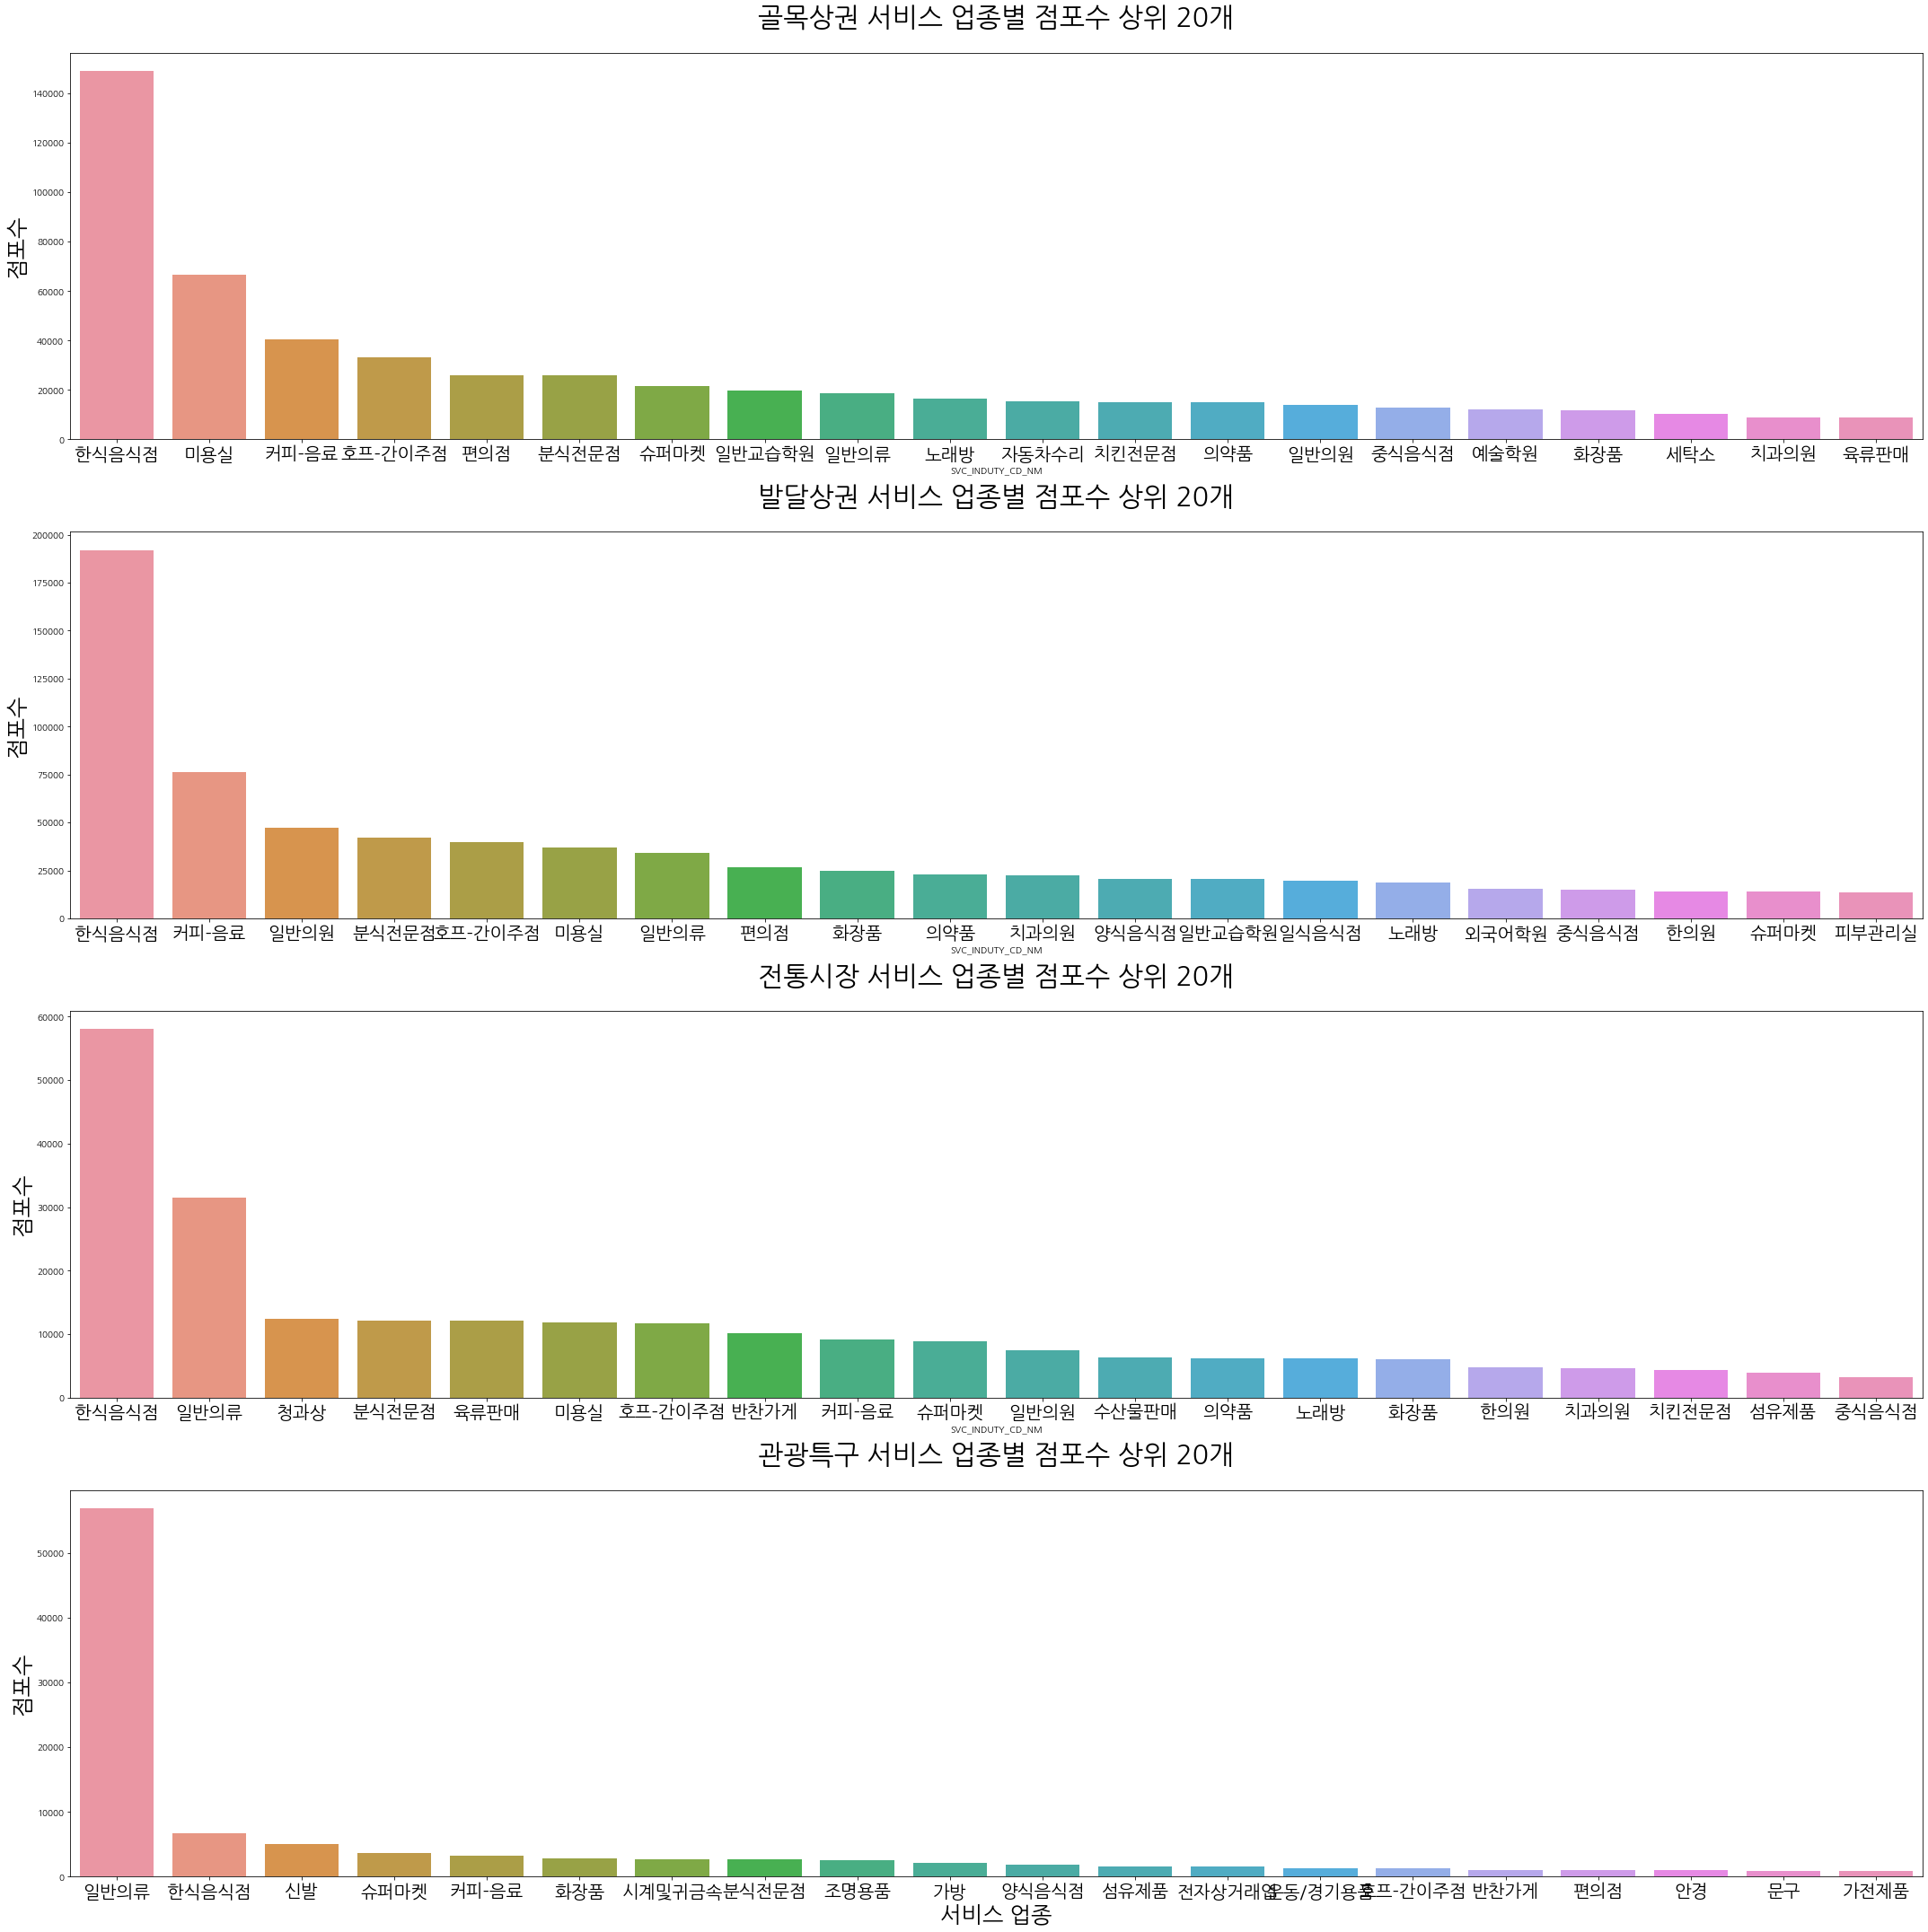

In [13]:
se_list = data['TRDAR_SE_CD_NM'].unique().tolist()

plt.figure(figsize=(30, 30))
for i in range(4):
    plt.subplot(4, 1, i+1)
    df = data[data['TRDAR_SE_CD_NM']== se_list[i]].groupby(['SVC_INDUTY_CD_NM'])['STOR_CO'].sum().to_frame().sort_values(by='STOR_CO', ascending =False).head(20)
    sns.barplot(x=df.index, y='STOR_CO', data=df)
    plt.title("{} 서비스 업종별 점포수 상위 20개".format(se_list[i]), fontsize = 30, pad=30)
    plt.ylabel("점포수", fontsize = 25)
    plt.xticks(fontsize = 20)
plt.xlabel("서비스 업종",fontsize = 25)
plt.tight_layout()
plt.show()

### 분기별 매출차이

In [14]:
# 분기별 매출 차이
pd.crosstab(data['TRDAR_SE_CD_NM'],data['STDR_QU_CD'], data['THSMON_SELNG_AMT'] , aggfunc=sum)

STDR_QU_CD,1,2,3,4
TRDAR_SE_CD_NM,,,,
골목상권,4742504676009,5235447597758,5086102592002,5255628928883
관광특구,1079608158678,1295644857184,1136695378342,1229236171701
발달상권,12458571658982,13430661342705,12811168947625,14534077950374
전통시장,3462068215333,3553210480151,3810643489893,3897226774181


<Figure size 2160x1440 with 0 Axes>

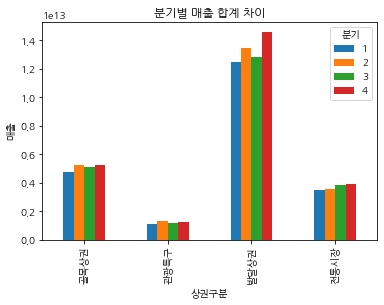

In [60]:
cross_table = pd.crosstab(data['TRDAR_SE_CD_NM'], data['STDR_QU_CD'], values=data['THSMON_SELNG_AMT'], aggfunc=sum)

plt.figure(figsize=(30, 20))
cross_table.plot(kind='bar')
plt.title('분기별 매출 합계 차이')
plt.xlabel('상권구분')
plt.ylabel('매출')
plt.legend(title='분기', loc='upper right')
plt.show()

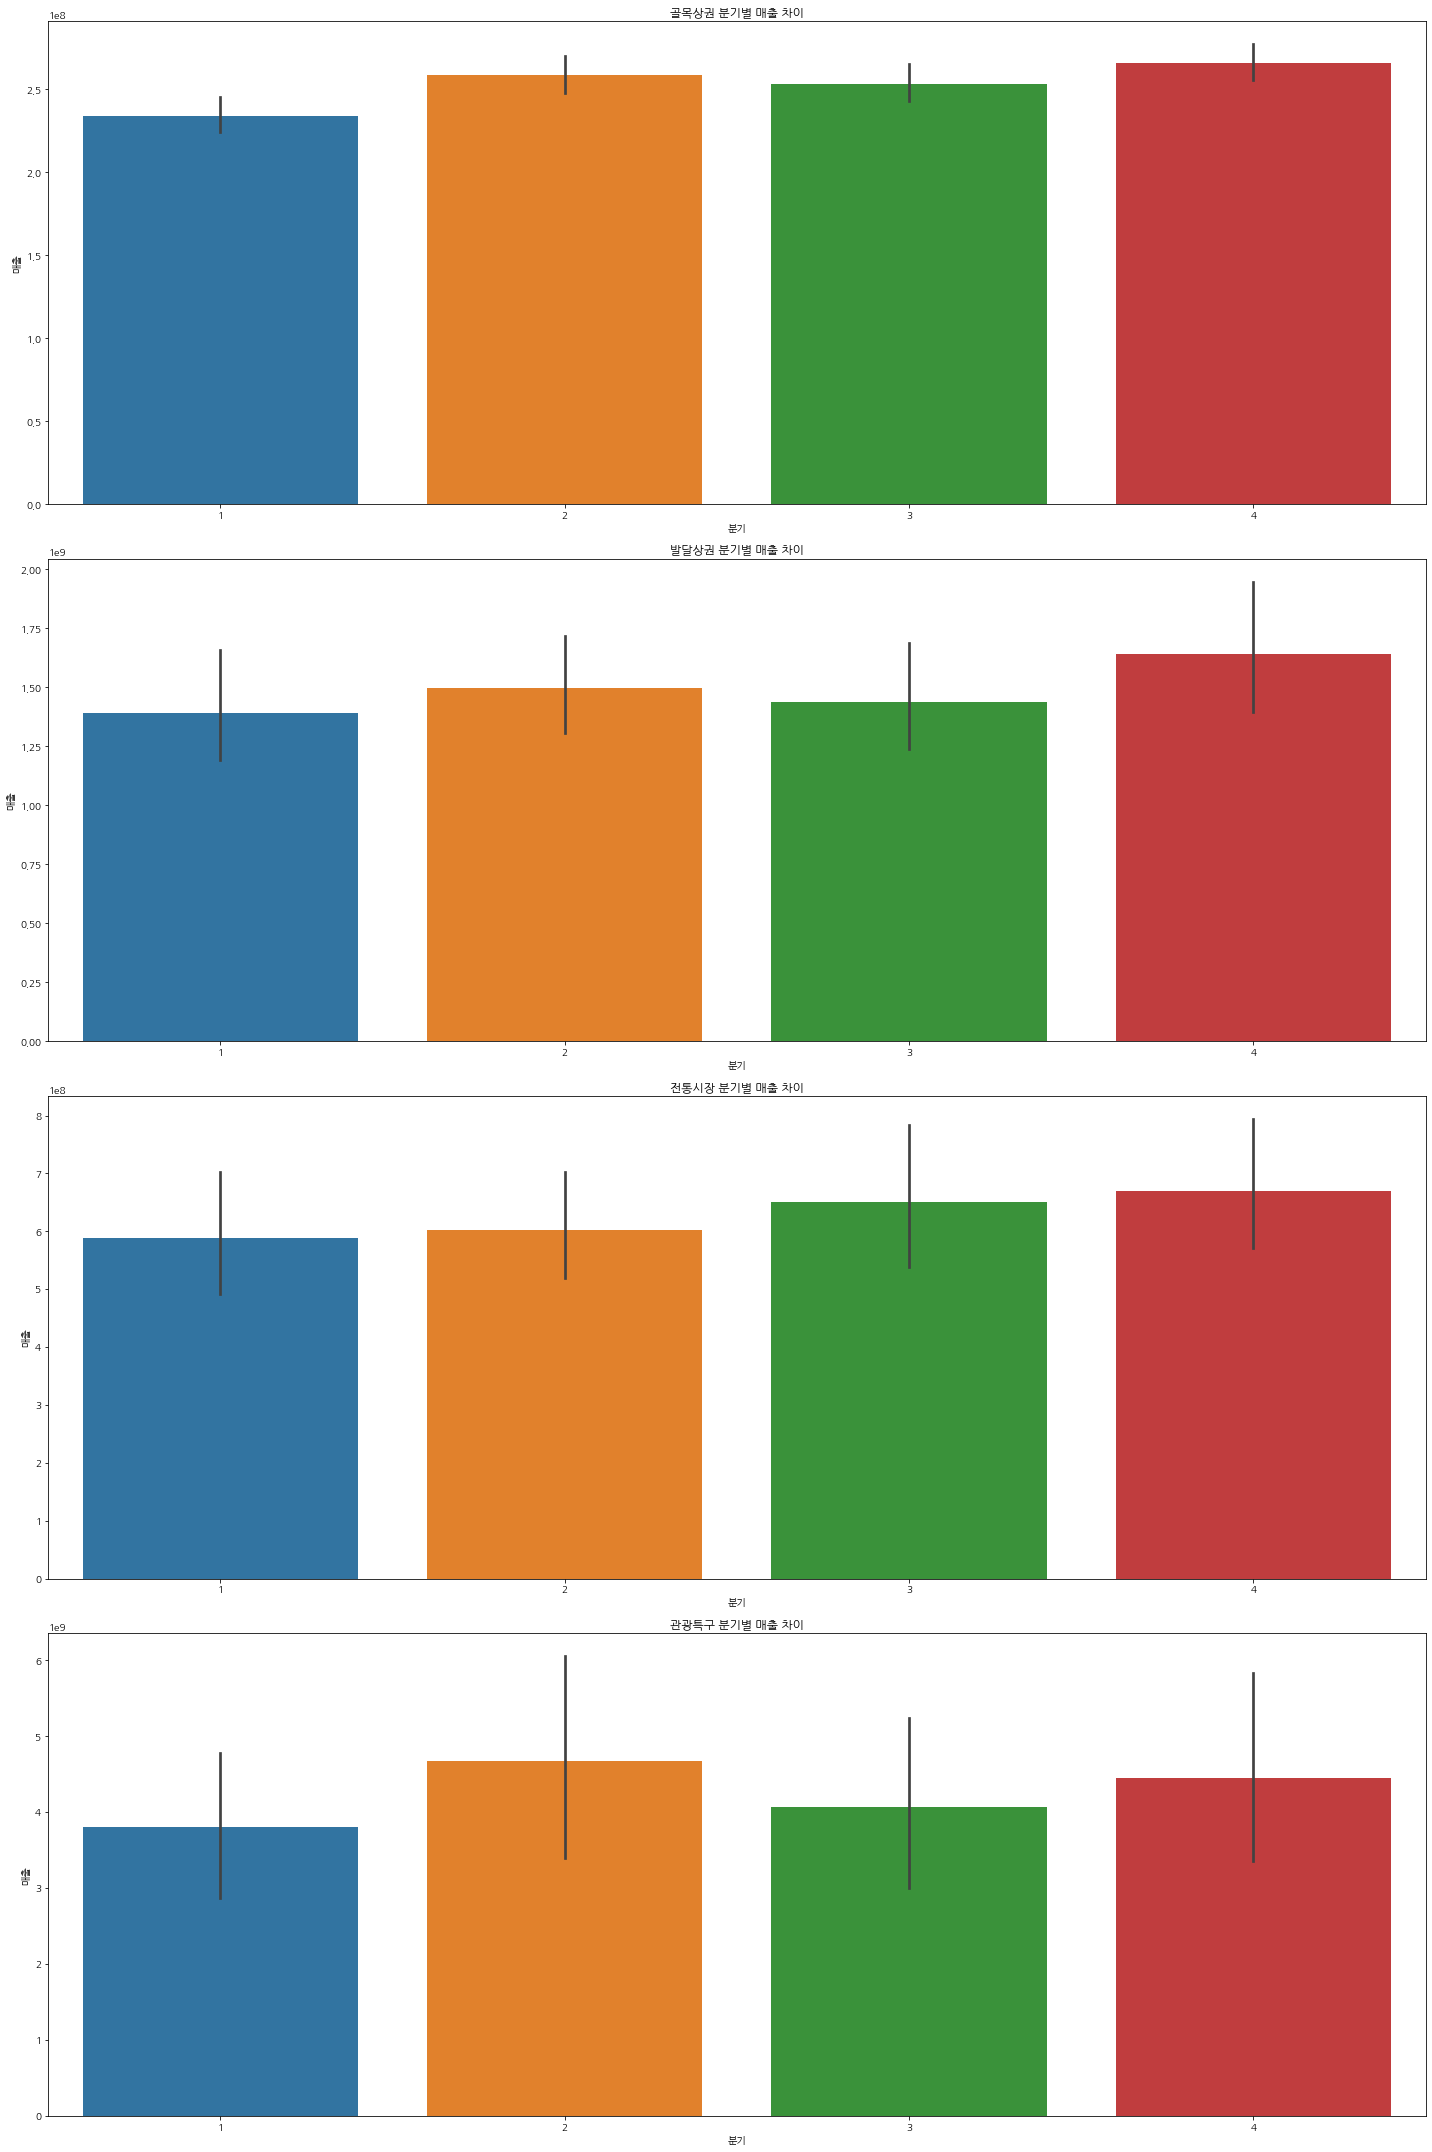

In [17]:
# 분기별 매출 평균 차이
plt.figure(figsize=(20, 30))
for i in range(4):
    plt.subplot(4, 1, i+1)
    sns.barplot(x='STDR_QU_CD', y ='THSMON_SELNG_AMT', data = data[data['TRDAR_SE_CD_NM']== se_list[i]])
    plt.title("{} 분기별 매출 차이".format(se_list[i]))
    plt.xlabel("분기")
    plt.ylabel("매출")
plt.tight_layout()
plt.show()

### 상권구분별 서비스 업종별 평균 매출

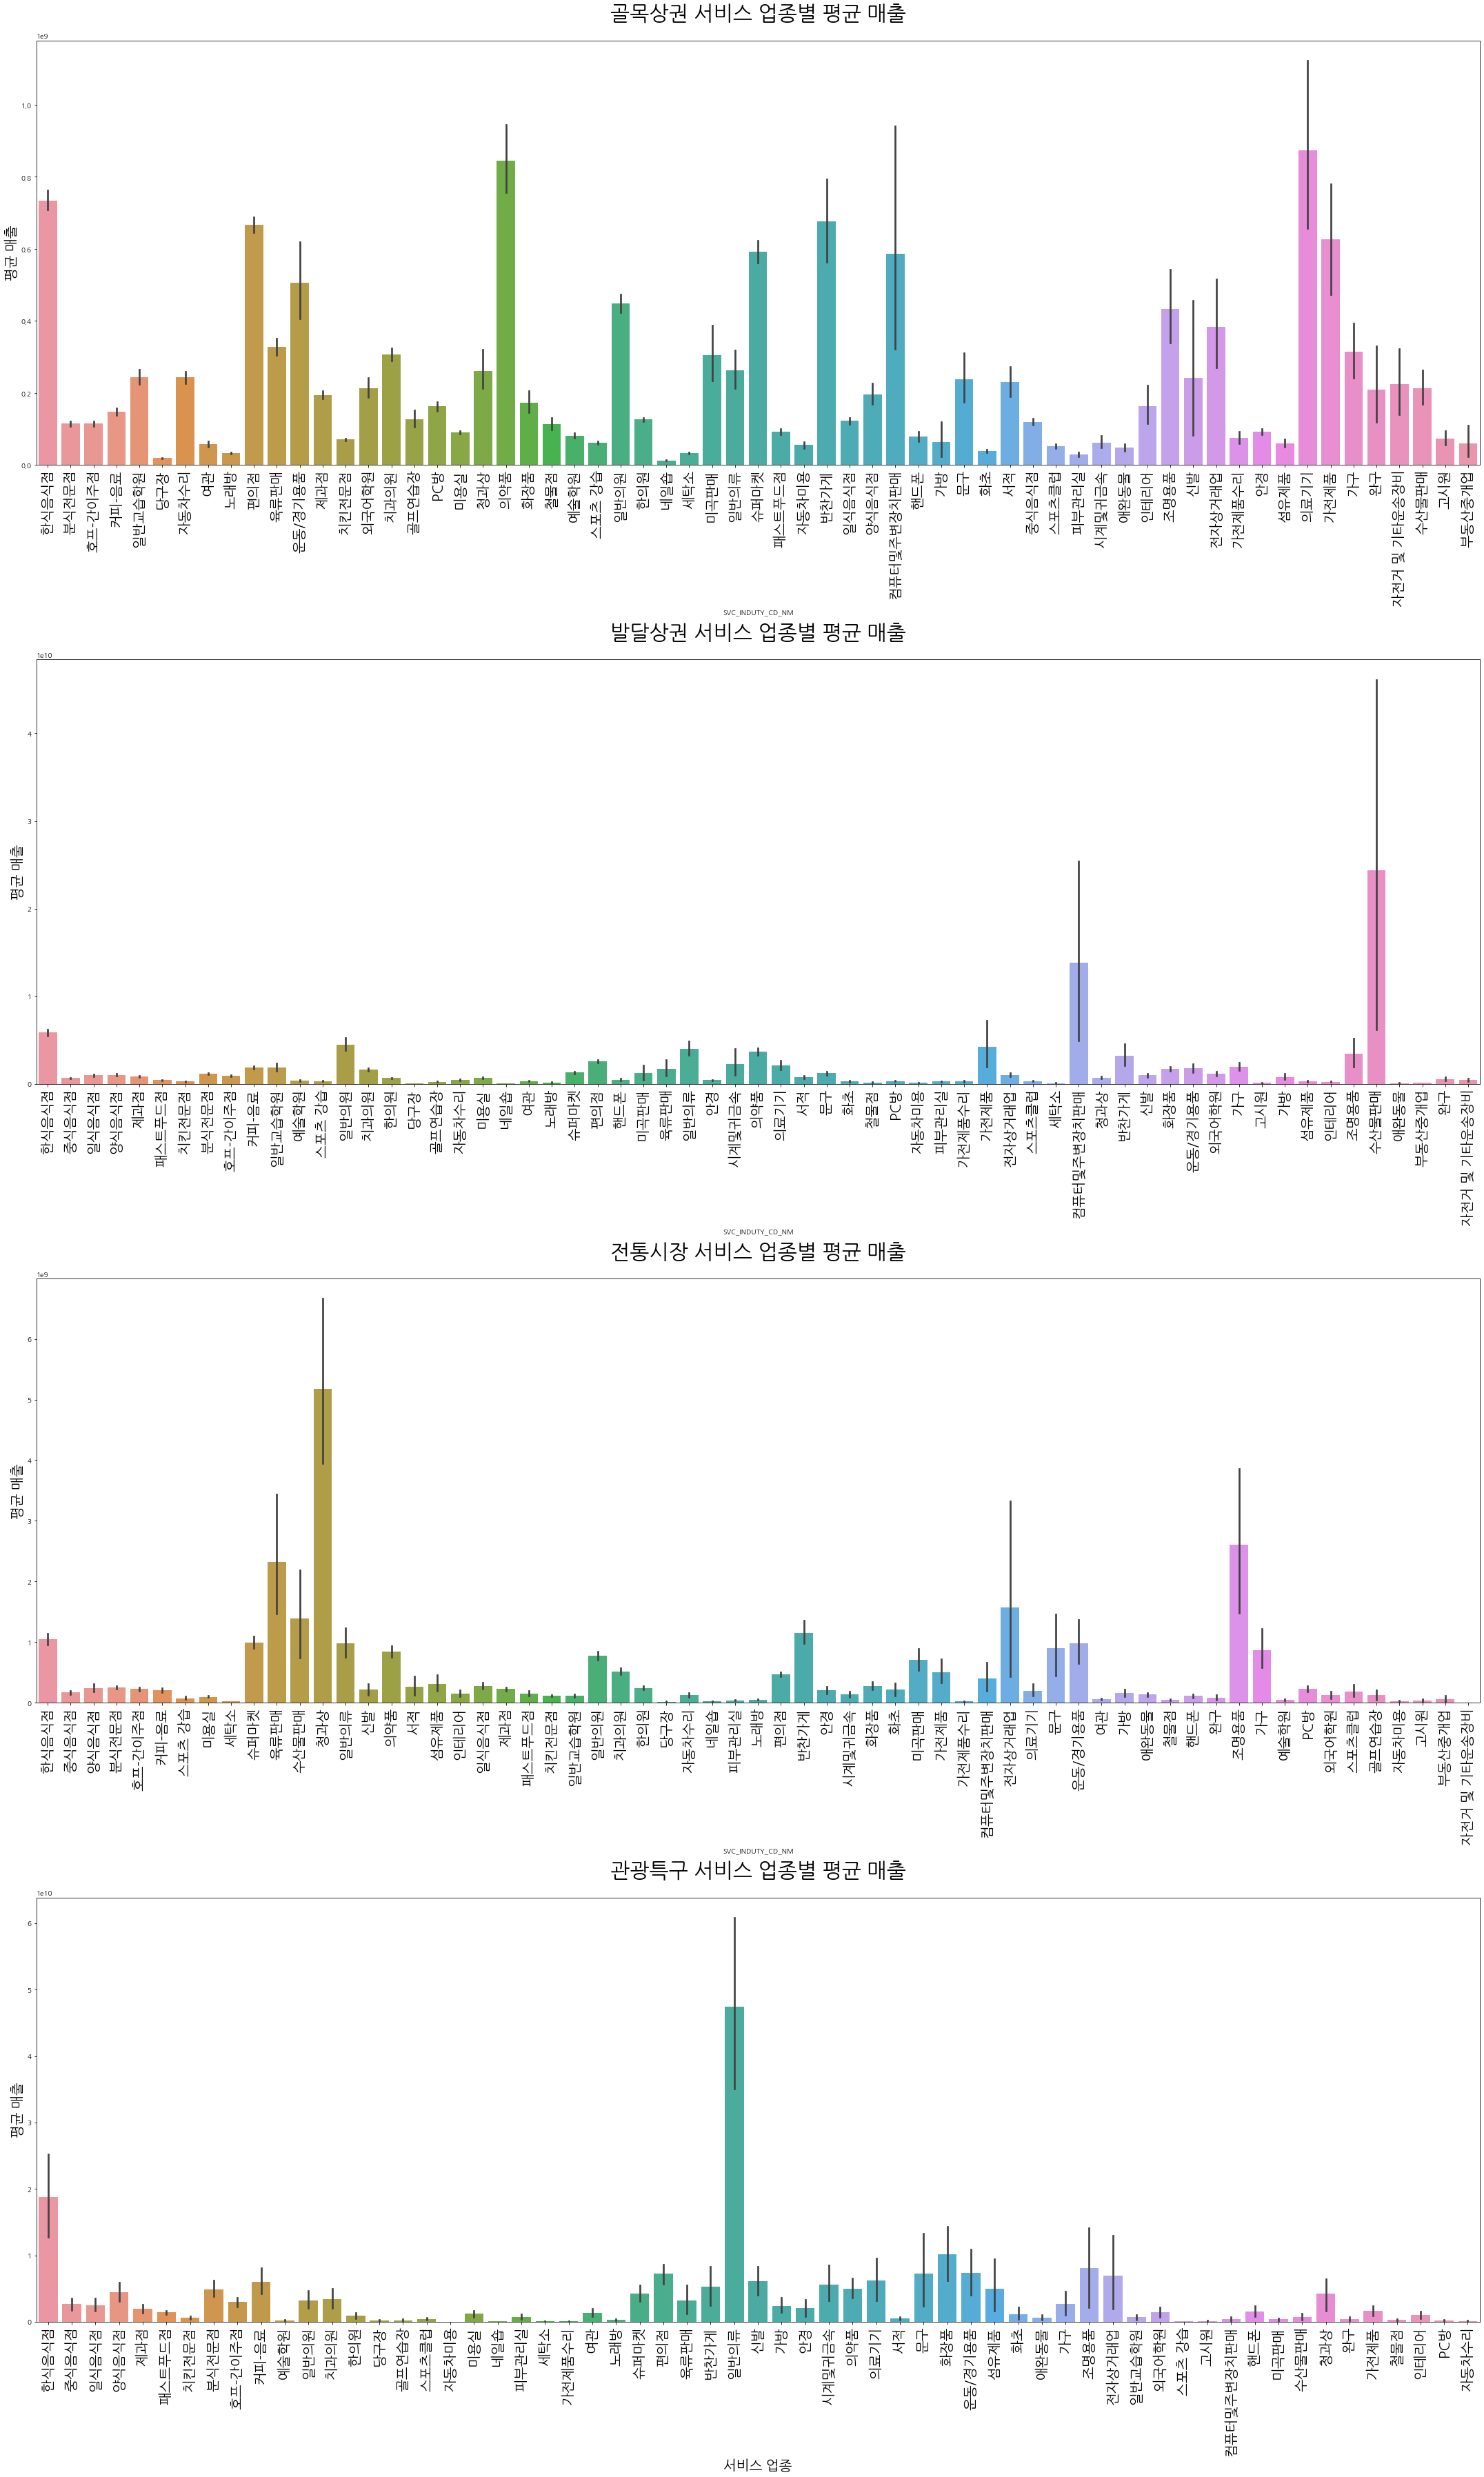

In [18]:
plt.figure(figsize=(30, 50))
for i in range(4):
    plt.subplot(4, 1, i+1)
    df = data[data['TRDAR_SE_CD_NM'] == se_list[i]]
    sns.barplot(x='SVC_INDUTY_CD_NM', y='THSMON_SELNG_AMT', data=df)
    plt.title("{} 서비스 업종별 평균 매출".format(se_list[i]), fontsize=30, pad=30)
    plt.ylabel('평균 매출', fontsize=20)
    plt.xticks(rotation=90, fontsize=20)
plt.xlabel('서비스 업종', fontsize = 20)
plt.tight_layout()
plt.show()

골목상권에서 가장 높은 평균 매출을 기록하는 서비스는 '의료기기'이다.  
두번째는 '의약품'이다.  
세번째는 '한식음식점'이다.  

발달상권에서 가장 높은 평균 매출을 기록한 서비스는 '수산물판매'이다.  
두번째는 '컴퓨터 및 주변장치'이다.

전통시장에서 가장 높은 평균 매출을 기록한 서비스는 '청과상'이다.  
두번째는 '조명용품'이다.  
세번째는 '육류판매'이다.

관광특구에서 가장 높은 평균 매출을 기록한 서비스는 '일반의류'이다.  
두번째는 '한식음식점'이다.  

### 서비스 업종별 건당 평균 매출

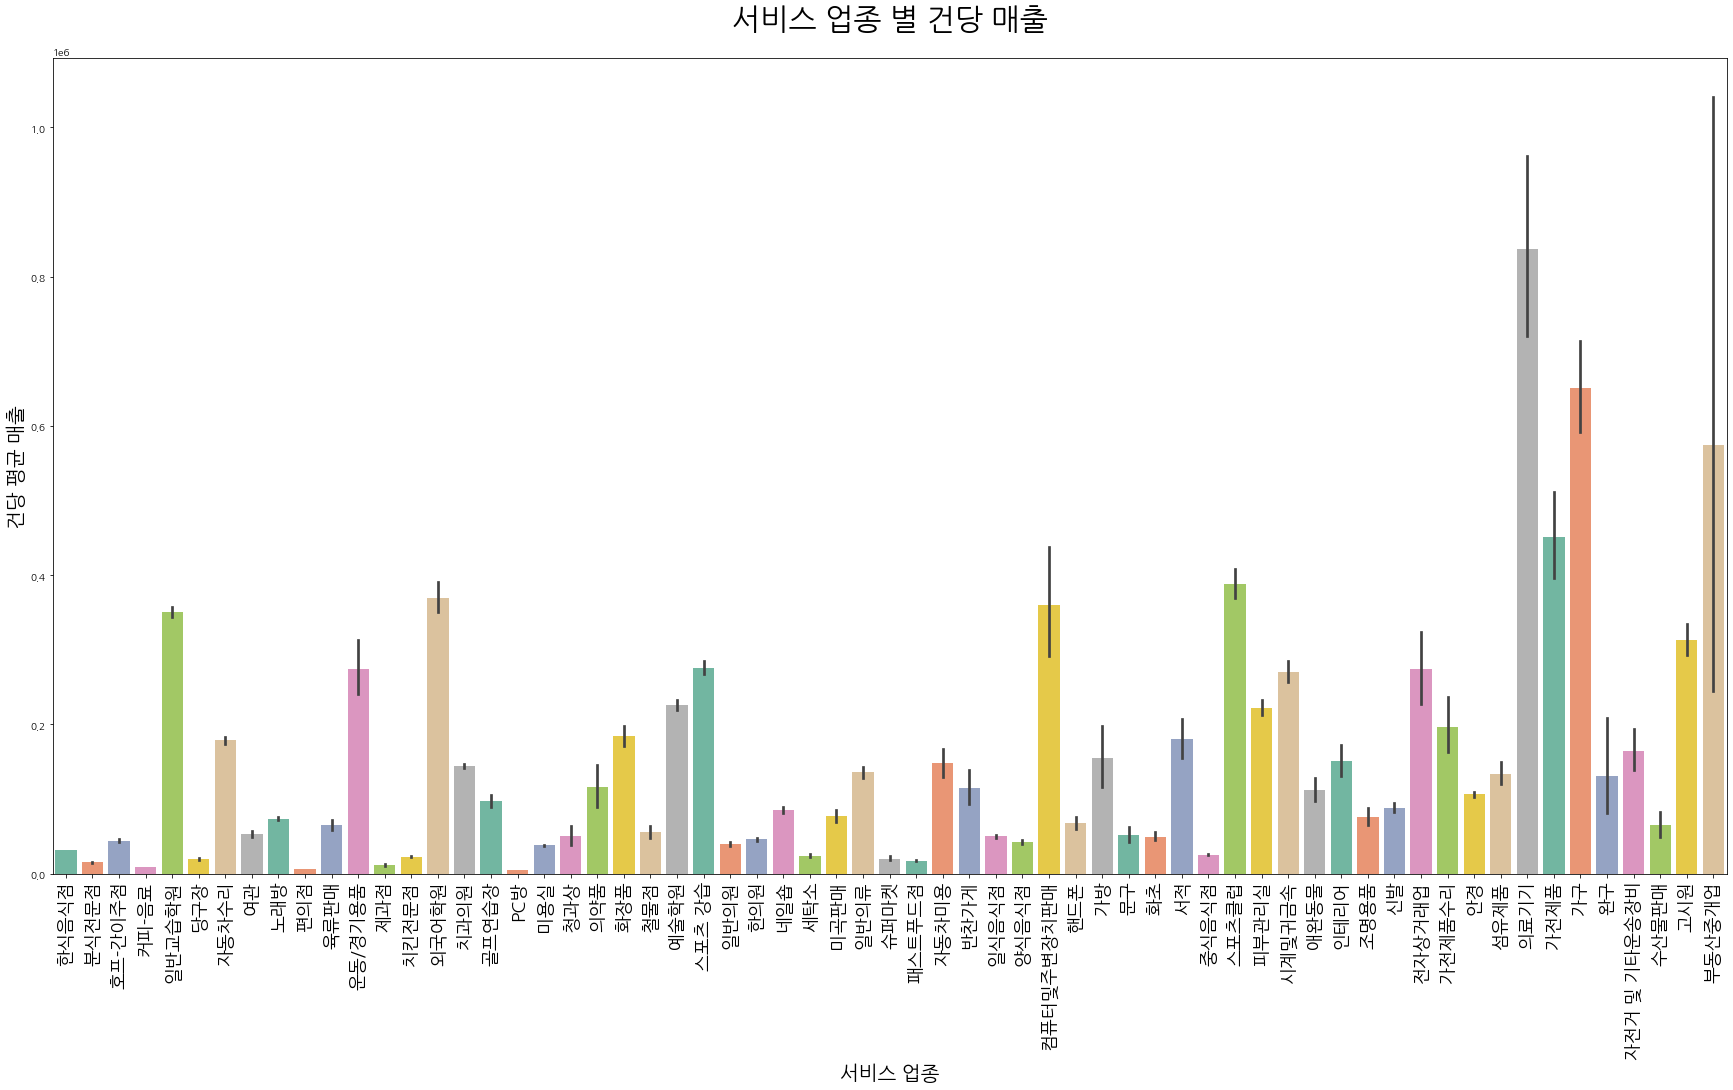

In [19]:
# 건당 평균 매출 컬럼 생성
data['THSMON_AMT_PER_CO_AVG'] = data['THSMON_SELNG_AMT']/data['THSMON_SELNG_CO']

# 서비스 업종별 건당 평균 매출

fig = plt.figure(figsize=(30, 15))
sns.barplot(x='SVC_INDUTY_CD_NM', y ='THSMON_AMT_PER_CO_AVG', data = data, palette='Set2')
plt.title("서비스 업종 별 건당 매출", fontsize = 30, pad=30)
plt.xticks(rotation=90, fontsize = 18)
plt.xlabel("서비스 업종", fontsize = 20)
plt.ylabel("건당 평균 매출", fontsize = 20)
plt.show()

서비스 업종별로 건당 평균 매출이 가장 높은 서비스는 '의료기기'이다.  
두번째는 '가구'이다.  
세번째는 '부동산중개업'이다.

In [68]:
# 연령대별 건당 매출 금액
data['10_AMT_PER_CO_AVG'] = np.where((data['AGRDE_10_SELNG_AMT'] == 0)|(data['AGRDE_10_SELNG_CO'] == 0), 0, data['AGRDE_10_SELNG_AMT'] / data['AGRDE_10_SELNG_CO'])
data['20_AMT_PER_CO_AVG'] = np.where((data['AGRDE_20_SELNG_AMT'] == 0)|(data['AGRDE_20_SELNG_CO'] == 0), 0, data['AGRDE_20_SELNG_AMT'] / data['AGRDE_20_SELNG_CO'])
data['30_AMT_PER_CO_AVG'] = np.where((data['AGRDE_30_SELNG_AMT'] == 0)|(data['AGRDE_30_SELNG_CO'] == 0), 0, data['AGRDE_30_SELNG_AMT'] / data['AGRDE_30_SELNG_CO'])
data['40_AMT_PER_CO_AVG'] = np.where((data['AGRDE_40_SELNG_AMT'] == 0)|(data['AGRDE_40_SELNG_CO'] == 0), 0, data['AGRDE_40_SELNG_AMT'] / data['AGRDE_40_SELNG_CO'])
data['50_AMT_PER_CO_AVG'] = np.where((data['AGRDE_50_SELNG_AMT'] == 0)|(data['AGRDE_50_SELNG_CO'] == 0), 0, data['AGRDE_50_SELNG_AMT'] / data['AGRDE_50_SELNG_CO'])
data['60_AMT_PER_CO_AVG'] = np.where((data['AGRDE_60_ABOVE_SELNG_AMT'] == 0)|(data['AGRDE_60_ABOVE_SELNG_CO'] == 0), 0, data['AGRDE_60_ABOVE_SELNG_AMT'] / data['AGRDE_60_ABOVE_SELNG_CO'])

# plt.figure(figsize=(30, 60))
# for i in range(6):
#     plt.subplot(6, 1, i+1)
#     df = data[data['TRDAR_SE_CD_NM'] == se_list[i]]
#     sns.barplot(x='SVC_INDUTY_CD_NM', y='THSMON_SELNG_AMT', data=df)
#     plt.title("{} 서비스 업종별 평균 매출".format(se_list[i]), fontsize=30)
#     plt.ylabel('평균 매출', fontsize=20)
#     plt.xticks(rotation=90, fontsize=20)
# plt.xlabel('서비스 업종', fontsize = 20)
# plt.tight_layout()
# plt.show()

In [74]:
data[data['AGRDE_10_SELNG_AMT'] == 0]['AGRDE_10_SELNG_CO'].value_counts()

0      69788
12         3
16         3
26         3
9          2
10         2
14         2
25         2
8          1
13         1
269        1
15         1
28         1
29         1
30         1
33         1
Name: AGRDE_10_SELNG_CO, dtype: int64

In [69]:
data['10_AMT_PER_CO_AVG'].describe()

count    1.408300e+05
mean     1.087942e+04
std      4.545172e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.561940e+03
75%      1.001376e+04
max      6.062798e+06
Name: 10_AMT_PER_CO_AVG, dtype: float64

In [70]:
data['20_AMT_PER_CO_AVG']

0          16805.518215
1           5033.556156
2              0.000000
3           8371.288066
4              0.000000
              ...      
140825     24596.357097
140826    204666.391304
140827    161531.926667
140828         0.000000
140829     15255.444444
Name: 20_AMT_PER_CO_AVG, Length: 140830, dtype: float64

In [65]:
data['AGRDE_10_SELNG_CO']

0         108
1          52
2           0
3           0
4           0
         ... 
140825    105
140826      0
140827    144
140828      0
140829      0
Name: AGRDE_10_SELNG_CO, Length: 140830, dtype: int64

### 서비스별 성별 비율

In [42]:
data.groupby(['SVC_INDUTY_CD_NM']).mean()[['ML_SELNG_RATE','FML_SELNG_RATE']].sort_values(by = 'ML_SELNG_RATE', ascending =False)

,ML_SELNG_RATE,FML_SELNG_RATE
SVC_INDUTY_CD_NM,,
당구장,88.810000,11.282500
PC방,83.793186,16.303048
노래방,82.552827,17.538264
여관,76.597694,23.493325
골프연습장,75.607198,24.487749
자전거 및 기타운송장비,74.635000,25.500000
자동차수리,74.106246,25.993211
자동차미용,72.037349,28.034940
호프-간이주점,69.668294,30.427557


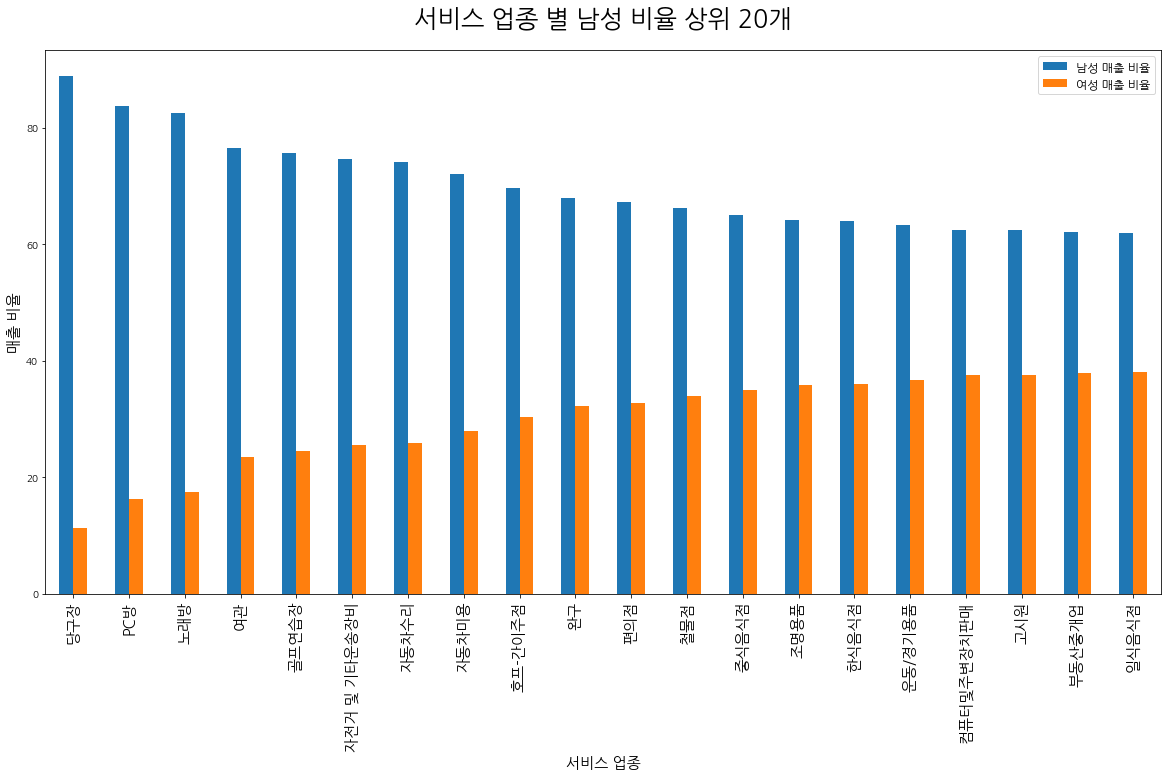

In [47]:
top_20_industries = data.groupby(['SVC_INDUTY_CD_NM']).mean()[['ML_SELNG_RATE', 'FML_SELNG_RATE']].sort_values(by='ML_SELNG_RATE', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(20, 10))
top_20_industries.plot(kind='bar', ax=ax)
ax.set_title('서비스 업종 별 남성 비율 상위 20개', fontsize=25, pad =25)
ax.set_xlabel("서비스 업종", fontsize=15)
ax.set_ylabel("매출 비율", fontsize=15)
ax.legend(["남성 매출 비율", "여성 매출 비율"], fontsize=12)
ax.set_xticklabels(top_20_industries.index, rotation=90, fontsize=15)
plt.show()

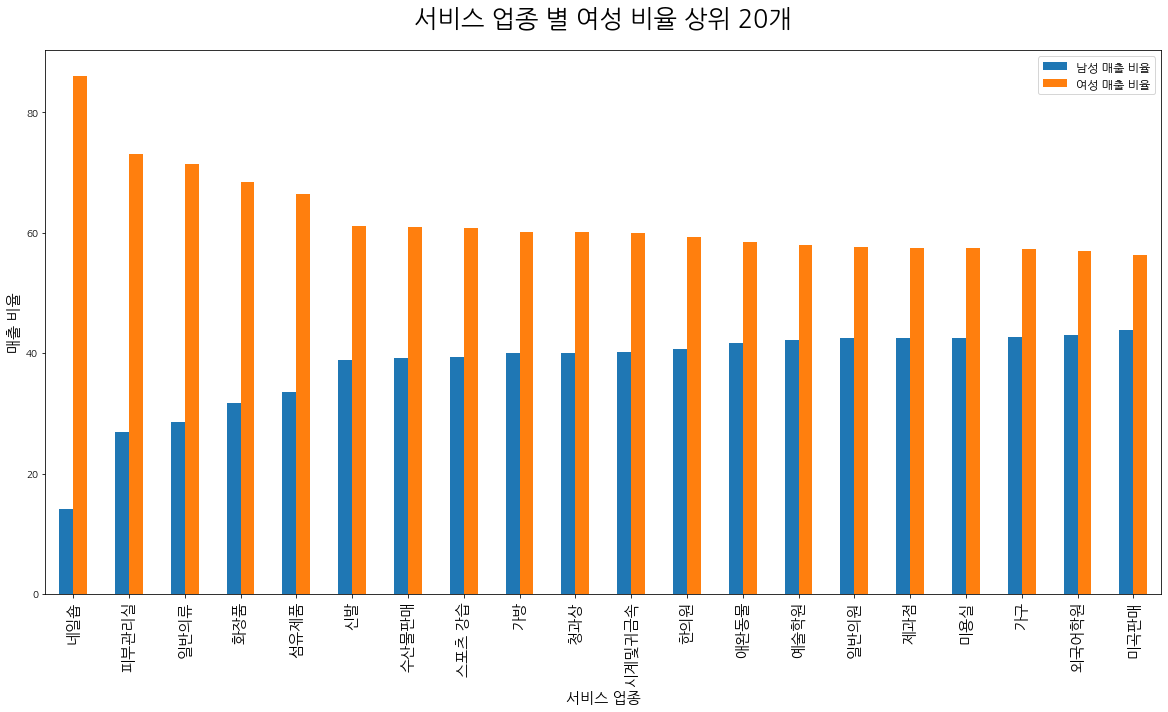

In [48]:
top_20_industries = data.groupby(['SVC_INDUTY_CD_NM']).mean()[['ML_SELNG_RATE', 'FML_SELNG_RATE']].sort_values(by='FML_SELNG_RATE', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(20, 10))
top_20_industries.plot(kind='bar', ax=ax)
ax.set_title('서비스 업종 별 여성 비율 상위 20개', fontsize=25, pad =25)
ax.set_xlabel("서비스 업종", fontsize=15)
ax.set_ylabel("매출 비율", fontsize=15)
ax.legend(["남성 매출 비율", "여성 매출 비율"], fontsize=12)
ax.set_xticklabels(top_20_industries.index, rotation=90, fontsize=15)
plt.show()

### 서비스 업종별 연령대 비율 

In [61]:
data.groupby(['SVC_INDUTY_CD_NM']).mean()[['AGRDE_10_SELNG_RATE', 'AGRDE_20_SELNG_RATE','AGRDE_30_SELNG_RATE','AGRDE_40_SELNG_RATE','AGRDE_50_SELNG_RATE', 'AGRDE_60_ABOVE_SELNG_RATE']].head(20)

,AGRDE_10_SELNG_RATE,AGRDE_20_SELNG_RATE,AGRDE_30_SELNG_RATE,AGRDE_40_SELNG_RATE,AGRDE_50_SELNG_RATE,AGRDE_60_ABOVE_SELNG_RATE
SVC_INDUTY_CD_NM,,,,,,
PC방,7.985655,56.937238,21.451285,6.946802,5.377167,1.527197
가구,0.034059,4.778619,12.666982,18.100284,30.979186,33.612110
가방,0.659091,12.066116,15.359504,14.923554,27.250000,29.944215
가전제품,0.183056,5.821483,14.299546,17.880484,29.175492,32.798790
가전제품수리,0.083470,6.176759,14.986907,21.021277,27.037643,30.844517
고시원,0.416949,15.081356,20.616949,24.867797,21.023729,18.040678
골프연습장,0.037519,5.475498,20.754977,30.683002,31.424196,11.861409
네일숍,0.538708,16.439539,26.738324,25.729367,19.644914,11.082534
노래방,1.285551,12.635351,16.115077,22.910051,31.446031,15.829812


In [49]:
# 상권업종대분류 컬럼 생성
data['SVC_INDUTY_BIGCD_NM'] = data['SVC_INDUTY_CD_NM'].apply(lambda x: '소매' if x in ['애완동물','자전거 및 기타운송장비','조명용품','완구','육류판매','가전제품', '서적', '철물점','화장품','제과점', 
                                                                                 '전자상거래업', '청과상', '핸드폰', '컴퓨터및주변장치판매', '반찬가게','가방', '가구', '슈퍼마켓', '화초', '인테리어', 
                                                                                 '수산물판매','미곡판매', '일반의류', '문구', '편의점', '의료기기', '신발', '안경','시계및귀금속']
                                             else '음식점' if x in ['일식음식점', '패스트푸드점', '한식음식점', '중식음식점', '분식전문점', '커피-음료', '양식음식점', '치킨전문점']
                                             else '여가/오락' if x in ['당구장', '네일숍','피부관리실' ,'PC방','노래방', '여관','자동차미용'] 
                                             else '스포츠'if x in['스포츠클럽','운동/경기용품', '스포츠 강습' ,'골프연습장']
                                             else '의원' if x in ['일반의원', '치과의원' , '한의원']
                                             else '생활서비스'if x in['부동산중개업', '미용실','세탁소','자동차수리']
                                             else '학원/교육')

# 결과 출력
data['SVC_INDUTY_BIGCD_NM'].unique()

array(['음식점', '학원/교육', '여가/오락', '생활서비스', '소매', '스포츠', '의원'], dtype=object)

In [53]:
svc_age_rate = data.groupby('SVC_INDUTY_BIGCD_NM').mean()[['AGRDE_10_SELNG_RATE', 'AGRDE_20_SELNG_RATE', 'AGRDE_30_SELNG_RATE', 'AGRDE_40_SELNG_RATE', 'AGRDE_50_SELNG_RATE', 'AGRDE_60_ABOVE_SELNG_RATE']]
svc_age_rate

,AGRDE_10_SELNG_RATE,AGRDE_20_SELNG_RATE,AGRDE_30_SELNG_RATE,AGRDE_40_SELNG_RATE,AGRDE_50_SELNG_RATE,AGRDE_60_ABOVE_SELNG_RATE
SVC_INDUTY_BIGCD_NM,,,,,,
생활서비스,0.482507,11.524081,19.689753,24.103356,25.907950,18.531826
소매,0.675109,11.406012,17.026021,21.086799,25.141150,24.873727
스포츠,0.474549,14.532998,23.490678,31.446878,20.741935,9.488754
여가/오락,2.004606,19.565566,19.185847,20.669481,24.959313,13.824831
음식점,1.180146,19.670883,22.610344,23.158816,21.419806,12.217953
의원,0.160759,7.108333,14.296624,21.213713,26.306435,31.124684
학원/교육,0.367514,8.716563,14.975192,36.235449,22.737722,17.140315


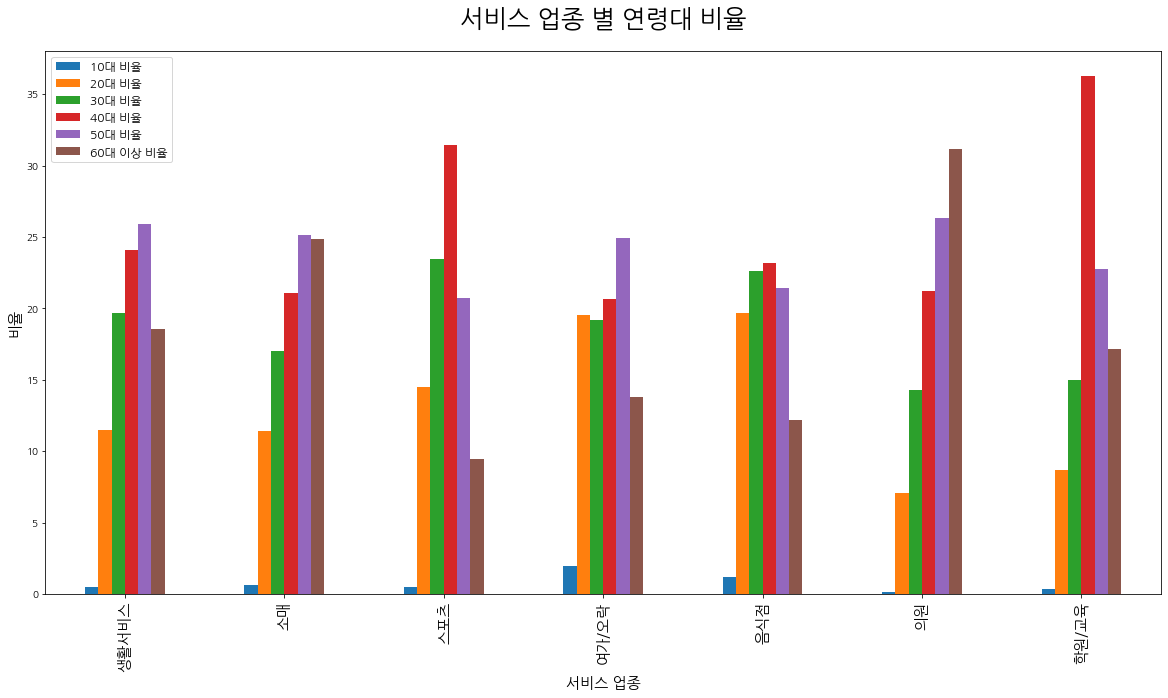

In [59]:
fig, ax = plt.subplots(figsize=(20, 10))
svc_age_rate.plot(kind='bar', ax=ax)
ax.set_title('서비스 업종 별 연령대 비율', fontsize=25, pad =25)
ax.set_xlabel("서비스 업종", fontsize=15)
ax.set_ylabel("비율", fontsize=15)
ax.legend(["10대 비율", "20대 비율","30대 비율","40대 비율","50대 비율","60대 이상 비율"], fontsize=12)
ax.set_xticklabels(svc_age_rate.index,fontsize=15)
plt.show()3